Filtered dataset contains 112120 images.
**Class Imbalance in ChestX-ray14 Dataset**
     Disease Class  Number of Samples
        No Finding              60361
      Infiltration              19894
          Effusion              13317
       Atelectasis              11559
            Nodule               6331
              Mass               5782
      Pneumothorax               5302
     Consolidation               4667
Pleural_Thickening               3385
      Cardiomegaly               2776
         Emphysema               2516
             Edema               2303
          Fibrosis               1686
         Pneumonia               1431
            Hernia                227


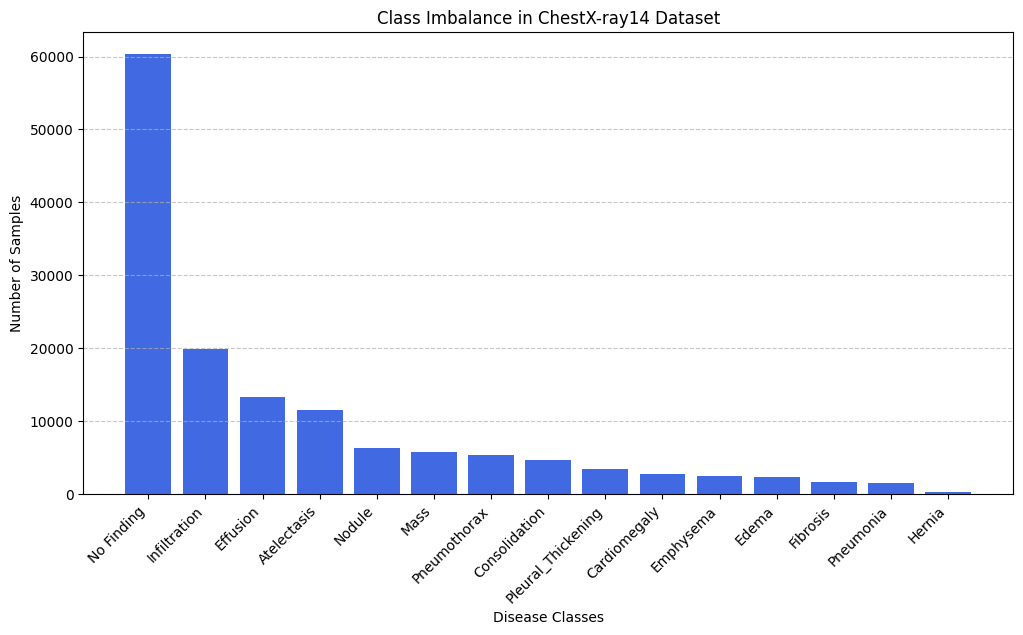

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# ------------------------------
# Load Metadata
# ------------------------------
csv_path = "/student/csc490_project/shared/labels.csv"
preprocessed_path = "/student/csc490_project/shared/preprocessed_images/preprocessed_images"

# Load dataset
df = pd.read_csv(csv_path)

# Keep only rows where 'Image Index' is in preprocessed images
preprocessed_images = set(os.listdir(preprocessed_path))
df = df[df["Image Index"].isin(preprocessed_images)]
print(f"Filtered dataset contains {len(df)} images.")

# Convert 'Finding Labels' column into lists of diseases
df["Finding Labels"] = df["Finding Labels"].apply(lambda x: x.split('|'))

# Encode labels using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = pd.DataFrame(mlb.fit_transform(df["Finding Labels"]), columns=mlb.classes_)

# Merge labels with dataset
df = df[['Image Index']].join(labels)

# ------------------------------
# Display Class Imbalance 
# ------------------------------
class_counts = df.iloc[:, 1:].sum().sort_values(ascending=False)

# Convert to DataFrame for better readability
class_counts_df = pd.DataFrame({"Disease Class": class_counts.index, "Number of Samples": class_counts.values})

# Display the dataset imbalance table
print("**Class Imbalance in ChestX-ray14 Dataset**")
print(class_counts_df.to_string(index=False))

import matplotlib.pyplot as plt

# Extract class counts from the dataset
class_counts = df.iloc[:, 1:].sum().sort_values(ascending=False)

# Plot bar chart for class imbalance
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index, class_counts.values, color='royalblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Disease Classes")
plt.ylabel("Number of Samples")
plt.title("Class Imbalance in ChestX-ray14 Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



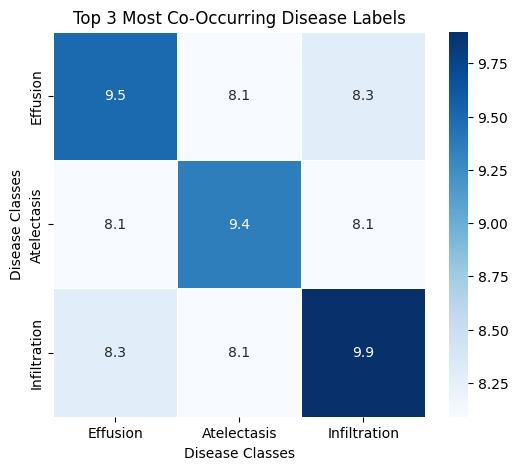

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute label co-occurrence matrix
co_occurrence_matrix = df.iloc[:, 1:].T.dot(df.iloc[:, 1:])

# Convert to log scale for better contrast
co_occurrence_log = np.log1p(co_occurrence_matrix)

# Get label names
labels = df.columns[1:]

# Find top 3 off-diagonal co-occurring pairs
co_occurrence_copy = co_occurrence_matrix.copy()
np.fill_diagonal(co_occurrence_copy.values, 0)  # Remove diagonal
top_pairs_idx = np.dstack(np.unravel_index(np.argsort(co_occurrence_copy.values.ravel())[::-1], co_occurrence_copy.shape))[0]

# Collect unique labels from top 3 pairs
top_labels = set()
for i in range(3):
    row_idx, col_idx = top_pairs_idx[i]
    top_labels.add(labels[row_idx])
    top_labels.add(labels[col_idx])
top_labels = list(top_labels)

# Filter matrix for selected labels
filtered_matrix = co_occurrence_log.loc[top_labels, top_labels]

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(filtered_matrix, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Top 3 Most Co-Occurring Disease Labels")
plt.xlabel("Disease Classes")
plt.ylabel("Disease Classes")
plt.show()


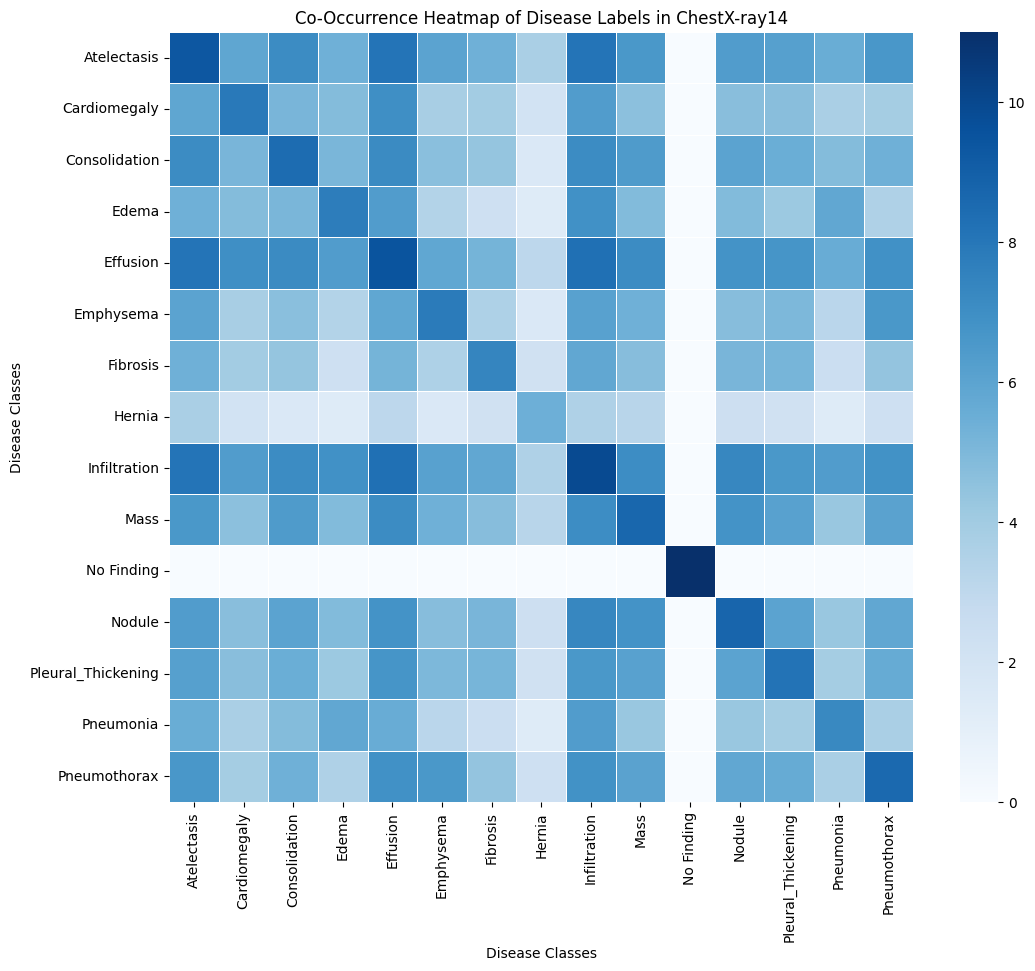

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute label co-occurrence matrix
co_occurrence_matrix = df.iloc[:, 1:].T.dot(df.iloc[:, 1:])

# Normalize the matrix for better visualization
co_occurrence_matrix = np.log1p(co_occurrence_matrix)  # Apply log scale for better contrast

# Plot heatmap of label co-occurrence
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=False, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Co-Occurrence Heatmap of Disease Labels in ChestX-ray14")
plt.xlabel("Disease Classes")
plt.ylabel("Disease Classes")

# Show the heatmap
plt.show()
